In [27]:
# funkce 
import numpy as np

def f(x):
    return x**2 -2*x + 1                    # body: x = 0, x = 1, x = 3

def g(x):
    return 3* np.log(2*x + 1) - 0.5        # body x = 0 , x = 10, x = -0.5

def h(x):
    return np.cos(x -np.pi/2) - np.pi/4     # x = -pi/4 , x = 0, x = pi



print(g(5))

6.693685818395112


In [55]:
# Funkce pro přidání šumu k funkčním hodnotám
def add_noise(f, magnitude=0.5):
    def f_noise(x):
        y = f(x)
        noise = np.random.normal(0, magnitude, len(x))  # Generování šumu pro všechny hodnoty x
        y += noise  # Přidání šumu ke všem funkčním hodnotám
        return y
    return f_noise

# Aplikace šumu na funkce s vyšší hodnotou magnitude
f_noise = add_noise(f, magnitude=0.2)
g_noise = add_noise(g, magnitude=0.2)
h_noise = add_noise(h, magnitude=0.2)

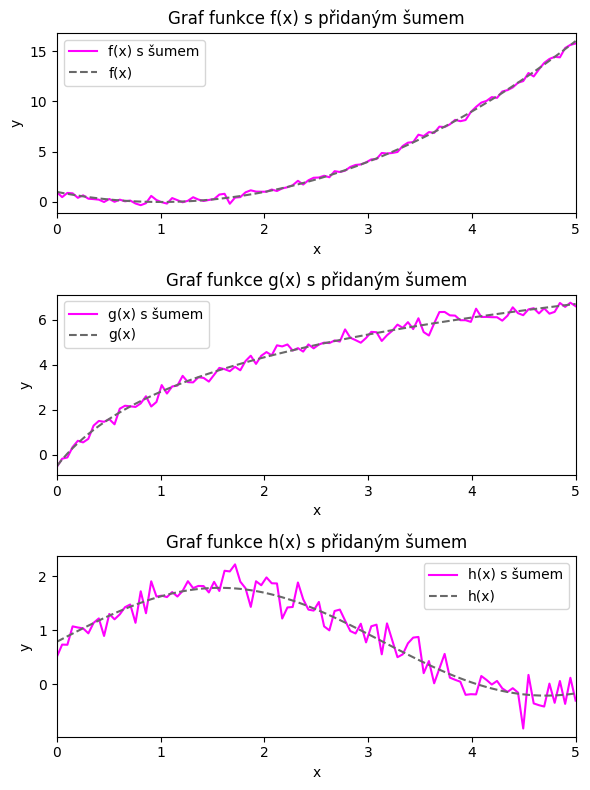

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Generování hodnot x pro funkci f(x) v intervalu [0, 5]
x_values = np.linspace(0, 5, 100)

# Vytvoření grafu
plt.figure(figsize=(6,8))

# Graf funkce f(x) s přidaným šumem v intervalu [0, 5]
plt.subplot(3, 1, 1)
plt.plot(x_values, f_noise(x_values), color="fuchsia", label="f(x) s šumem")
plt.plot(x_values, f(x_values), color="dimgrey", linestyle="dashed", label="f(x)")
plt.title("Graf funkce f(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  # Nastavení intervalu na ose x
plt.legend()

# Graf funkce g(x) s přidaným šumem
plt.subplot(3, 1, 2)
plt.plot(x_values, g_noise(x_values), color="fuchsia", label="g(x) s šumem")
plt.plot(x_values, g(x_values), color="dimgrey", linestyle="dashed", label="g(x)")
plt.title("Graf funkce g(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  # Nastavení intervalu na ose x
plt.legend()

# Graf funkce h(x) s přidaným šumem
plt.subplot(3, 1, 3)
plt.plot(x_values, h_noise(x_values), color="fuchsia", label="h(x) s šumem")
plt.plot(x_values, h(x_values), color="dimgrey", linestyle="dashed", label="h(x)")
plt.title("Graf funkce h(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  # Nastavení intervalu na ose x
plt.legend()

plt.tight_layout()
plt.show()
